In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [2]:
ed = pd.read_csv('Eurodollar.csv', index_col = 0)
ff = pd.read_csv('FEDFUNDS.csv', index_col = 0)

In [3]:
# CREATING DICTIONARY
dict1 = {0:ed.copy(),1:ff.copy()}
# SORTING DFs BY DATE
for x in range(len(dict1)):
    dict1[x] = dict1[x].reset_index()
    dict1[x]['Date'] = pd.to_datetime(dict1[x]['Date'])
    dict1[x] = dict1[x].sort_values(by = 'Date',ascending = True).reset_index(drop = True).set_index('Date')

In [4]:
# KEEPING ONLY CLOSE FOR EURODOLLAR
dict1[0] = pd.DataFrame(dict1[0]['Close']).reset_index()
# REST INDEX
dict1[1] = dict1[1].reset_index()

In [5]:
# CREATING THE 3M PREDICTED FF Column
dict1[0]['3M FF'] = 100 - dict1[0]['Close']
dict1[0]['Date'] = dict1[0]['Date'].shift(-3)
dict1[0] = dict1[0][['Date','3M FF']]

In [6]:
# MERGING EFFECTIVE FF, MASTER DF
df = dict1[0].merge(dict1[1],how = 'inner', on = 'Date')
df = df.set_index('Date')

In [7]:
# CORRELATION / LINEAR REGRESSION
st.linregress(x = df['3M FF'], y = df['FEDFUNDS'])

LinregressResult(slope=0.9810956729417384, intercept=-0.25306728864842, rvalue=0.9873831543090911, pvalue=0.0, stderr=0.007632158477678296, intercept_stderr=0.033321243123644866)

MSE: 0.28537429742388765
RMSE: 0.5342043592333253
RRMSE: 0.1720185976340485
MAE: 0.35400234192037494
RMAE: 0.11399193092266519
EV: 0.9745635246025927
R2: 0.9606325466586237


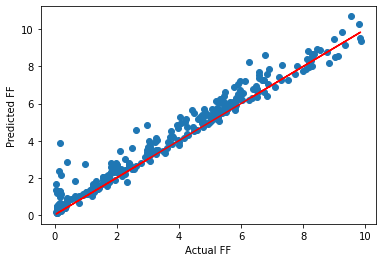

In [8]:
# PLOTTING VARIANCE BETWEEN EURODOLLAR AND FF
from sklearn import metrics

plt.scatter(df['FEDFUNDS'],df['3M FF'])
plt.plot(df['FEDFUNDS'],df['FEDFUNDS'],"r")
plt.xlabel('Actual FF')
plt.ylabel('Predicted FF')

# EVALUATE THE MODEL LM1
print("MSE:",metrics.mean_squared_error (df['FEDFUNDS'],df['3M FF']))
print("RMSE:", np.sqrt(metrics.mean_squared_error (df['FEDFUNDS'],df['3M FF'])))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (df['FEDFUNDS'],df['3M FF']))/df['FEDFUNDS'].mean())
print("MAE:", metrics.mean_absolute_error (df['FEDFUNDS'], df['3M FF']))
print("RMAE:", metrics.mean_absolute_error (df['FEDFUNDS'], df['3M FF'])/df['FEDFUNDS'].mean())
print("EV:", metrics.explained_variance_score(df['FEDFUNDS'],df['3M FF']))
print("R2:", metrics.r2_score(df['FEDFUNDS'],df['3M FF']))